In [60]:
#define library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

Datasetim "diabetes" dataset ve tamamı sayısal değerlerden oluşmakta


Dataset Variable:

* Pregnancies	
* Glucose	
* BloodPressure
* SkinThickness
* Insulin
* BMI	
* DiabetesPedigreeFunction	
* Age	
* Outcome


Outcome
* 1 = Diabet    // Hastanın diyabet olduğunu gösterir
* 0 = normal    // Hastanın diyabet olmadığını gösterir

In [3]:
df = pd.read_csv("diabetes.csv", encoding='latin-1')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(767, 9)

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df["Outcome"].value_counts()

0    499
1    268
Name: Outcome, dtype: int64

array([[<AxesSubplot:title={'center':'Glucose'}>]], dtype=object)

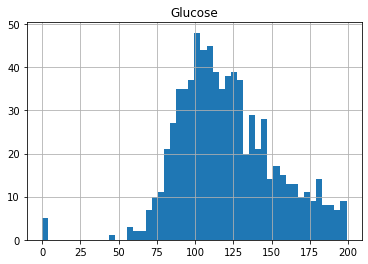

In [15]:
df.hist(column="Glucose", bins=50)

<AxesSubplot:xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

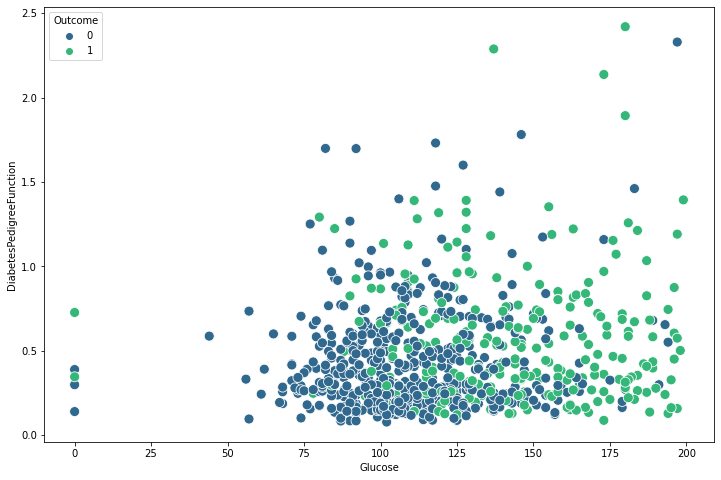

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', hue='Outcome', data=df, palette='viridis', s=100)

<Figure size 1152x648 with 0 Axes>

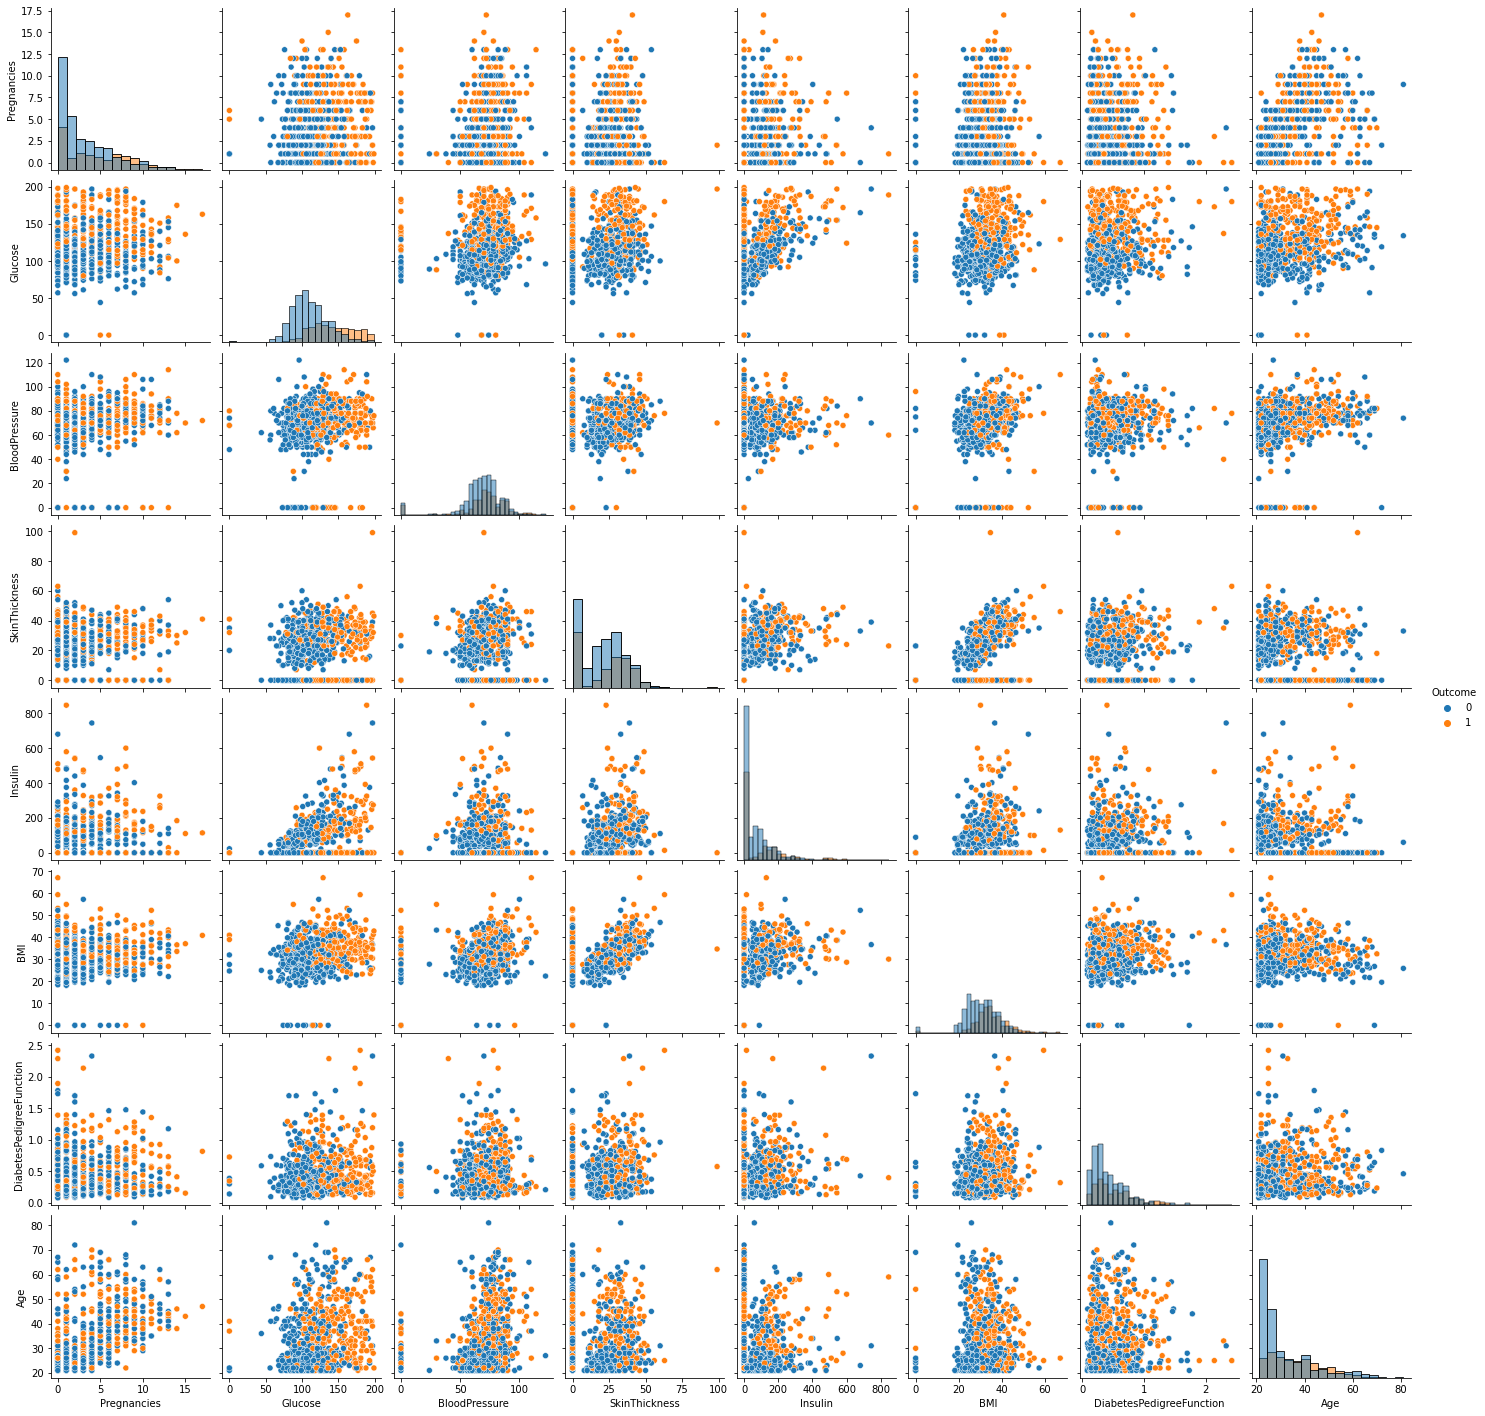

In [10]:
plt.figure(figsize=(16,9))
sns.pairplot(df,hue='Outcome',diag_kind='hist')

In [44]:
scale=StandardScaler()

In [45]:
scale.fit(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
              'BMI', 'DiabetesPedigreeFunction', 'Age']])

StandardScaler()

In [46]:
X=scale.transform(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                      'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [47]:
y=df['Outcome']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [41]:
# print ('Train set:', x_train.shape,  y_train.shape)
# print ('Test set:', x_test.shape,  y_test.shape)

Train set: (613, 8) (613,)
Test set: (154, 8) (154,)


In [49]:
training_accuracy=[]
test_accuracy=[]

In [50]:
n_set = range(1, 21)

Bu bölüm n_neighbors değerini 1 ile 20 arasında değiştirerek KNN sınıflandırıcıları eğitir.

In [51]:
for n in n_set:
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train,y_train)
    training_accuracy.append(clf.score(x_train,y_train))
    test_accuracy.append(clf.score(x_test,y_test))

c:\Users\avcil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\avcil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


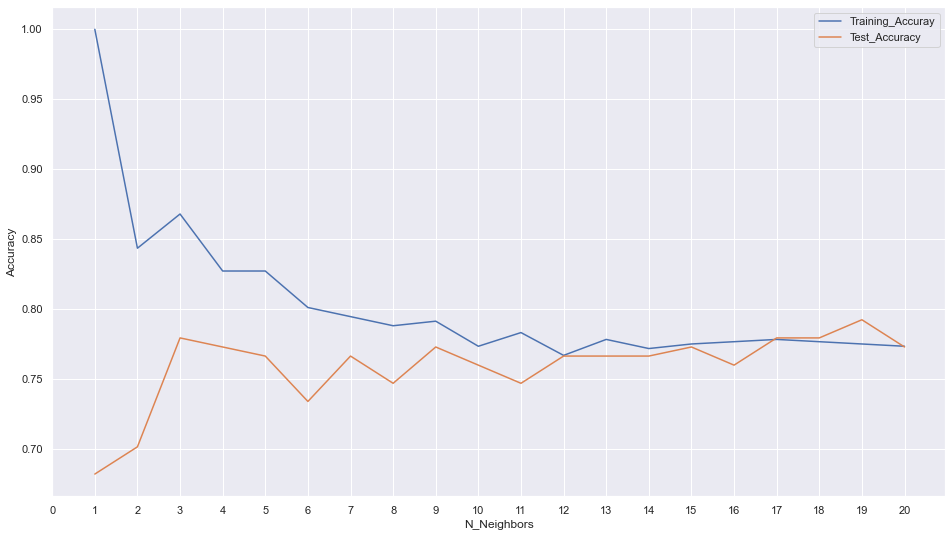

In [52]:
plt.figure(figsize=(16,9))
sns.set(style="darkgrid",context="notebook")
ax=sns.lineplot(range(1,21),training_accuracy,label='Training_Accuray') 
ax=sns.lineplot(range(1,21),test_accuracy,label='Test_Accuracy')
ax.set(xlabel ="N_Neighbors", ylabel = "Accuracy")
plt.xticks(range(0,21,1))
plt.show()

In [53]:
model=KNeighborsClassifier(13)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [54]:
model.score(x_test,y_test)

0.7662337662337663

In [55]:
model.predict(X)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

In [56]:
y_hat=model.predict(x_test)
confusion_matrix(y_test,y_hat)
pd.crosstab(y_test,y_hat,colnames=['Hypothesis class'],rownames=['True Class'],margins=True)

Hypothesis class,0,1,All
True Class,,,
0,88,12,100
1,24,30,54
All,112,42,154


Text(0.5, 12.5, 'Hypothesis Class')

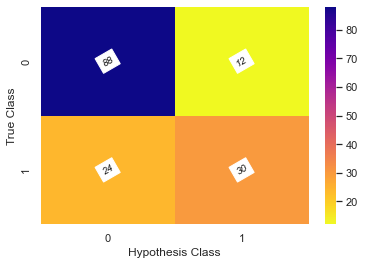

In [57]:
y_hat=model.predict(x_test)
con_mat=confusion_matrix(y_test,y_hat)
ax=sns.heatmap(pd.DataFrame(con_mat),annot=True,cmap="plasma_r" ,fmt='g',annot_kws=annot_modify)

plt.ylabel('True Class')
plt.xlabel('Hypothesis Class')

In [58]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.71      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [59]:
parameters={'n_neighbors':np.arange(1,50)}
model=KNeighborsClassifier()
grid_cv=GridSearchCV(model,parameters,cv=4)
grid_cv.fit(X,y)
print("Best Score:" + str(grid_cv.best_score_))
print("Best Parameters: " + str(grid_cv.best_params_))

Best Score:0.7653795811518325
Best Parameters: {'n_neighbors': 19}
